# ```Calculo Numérico 2 ::: ATIVIDADE 0```

```Usando os dados do crescimento de levedura da tabela a seguir, estime uma função de interpolação polinomial, ou regressão por mínimos quadrados que melhor se ajuste ao gráfico de p x Δp```

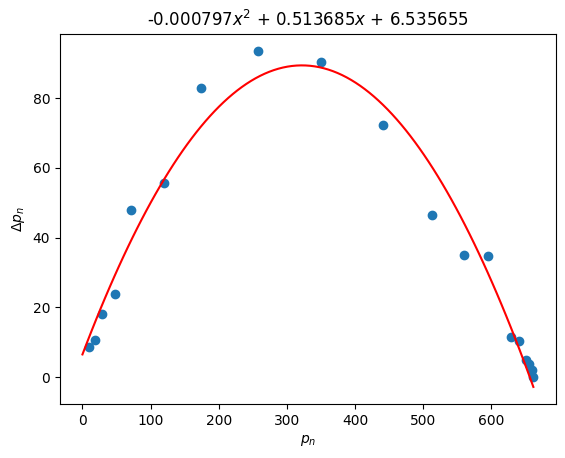

In [1]:
import numpy as np
import matplotlib.pylab as plt

def minimos_quadrados_polinomial(D, g):
    X = D[:,0]
    Y = D[:,1]
    
    h = g+1
    
    A = np.zeros((h,h))
    b = np.zeros(h)
    
    for i in range(h):
        for j in range(h):
            A[i,j] = np.sum((X)**(i+j))
            
    for i in range(h):
        b[i] = np.sum(((X)**i)*Y)
        
    d = np.linalg.solve(A,b)
    c = np.zeros(len(d))
    
    for i in range(len(d)):
        c[i] = d[len(d)-i-1]
    
    return c


# p Δp 
T = np.array([ [9.6,8.7],[18.3,10.7],[29,18.2],[47.2,23.9],[71.1,48],[119.1,55.5],[174.6,82.7],[257.3,93.4],[350.7,90.3],[441.0,72.3],[513.3,46.4],[559.7,35.1],[594.8,34.6],[629.4,11.4],[640.8,10.3],[651.1,4.8],[655.9,3.7],[659.6,2.2],[661.8,0] ])

c = minimos_quadrados_polinomial(T,2)

x = np.linspace(0, np.max(T[:,0]), 100)
y = np.polyval(c, x)

plt.title(f"{c[0]:.6f}$x^2$ + {c[1]:.6f}$x$ + {c[2]:.6f}")
plt.xlabel('$p_n$')
plt.ylabel('$\Delta p_n$')
plt.scatter(T[:,0],T[:,1])
plt.plot(x,y, c='r')
plt.savefig('minimos_quadrados.pdf')
plt.show()

```Usando os mesmos dados faça uma adaptação do modelo de Verhust para o modelo de Gompertz. Estime a solução aproximada atravéz de equações em diferenças e a solução exata (usando o metodo de separação de variaveis)```

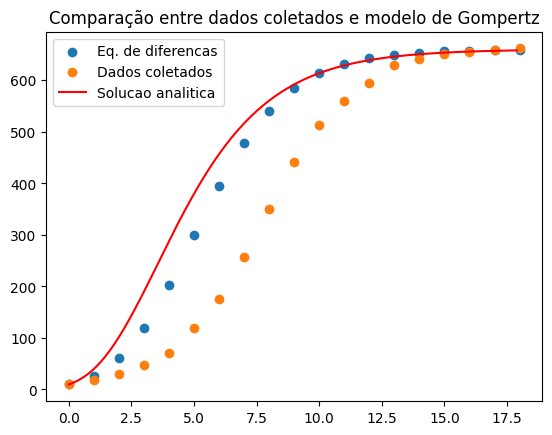

In [2]:
X = T[:,0]
Y = T[:,1]

p = np.zeros(19)
p[0] = X[0]

s = 660
k = (X[10]-X[9])/(X[9]*np.log(s/X[9]))

for i in range(18):
    p[i+1] = k*p[i]*np.log(s/p[i]) + p[i]
    
x = np.arange(0,18,0.1)
y = ((p[0]/s)**(np.exp(-k*x)))*s

plt.title('Comparação entre dados coletados e modelo de Gompertz')
plt.scatter(range(len(p)),p, label='Eq. de diferencas')
plt.scatter(range(len(p)),X, label='Dados coletados')
plt.plot(x,y, label='Solucao analitica', c='r')
plt.legend()
plt.savefig('gompertz.pdf')
plt.show()